In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from datetime import datetime
from sklearn.svm import SVC
import os
from sklearn.metrics import precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
sns.set(style="darkgrid")


In [6]:
data=pd.read_csv("Placement_Prediction_data.csv")

In [7]:
data.head()

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed


In [8]:
data.shape

(10000, 14)

In [9]:
print(data.isnull().sum())  # To check if any column has missing values


Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
dtype: int64


In [10]:
data = data.drop(columns=['Unnamed: 0', 'StudentId'])

In [11]:
label_encoder = LabelEncoder()
data['PlacementStatus'] = label_encoder.fit_transform(data['PlacementStatus'])
data['Internship'] = label_encoder.fit_transform(data['Internship'])
data['Hackathon'] = label_encoder.fit_transform(data['Hackathon'])


In [12]:
data.head()

,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
0,7.5,1,1,1,6,4.4,0,0,61,79,2,0
1,8.9,0,3,2,9,4.0,1,1,78,82,0,1
2,7.3,1,2,2,8,4.8,1,0,79,80,2,0
3,7.5,1,1,2,8,4.4,1,1,81,80,0,1
4,8.3,1,2,2,8,4.5,1,1,74,88,0,1


In [13]:
data.tail()

,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus
9995,7.5,1,1,2,7,3.9,1,0,85,66,4,0
9996,7.4,0,1,0,9,4.8,0,0,84,67,1,1
9997,8.4,1,3,0,7,4.8,1,1,79,81,0,1
9998,8.9,0,3,2,8,4.8,1,1,71,85,0,1
9999,8.4,0,1,1,6,3.8,0,0,62,66,1,0


In [14]:
data.shape

(10000, 12)

In [15]:
# Selecting features (X) and target variable (y)
X = data.drop(columns=['PlacementStatus'])
y = data['PlacementStatus']

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling the features (important for KNN and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),  # Set random_state here
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic_regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier()
}


In [19]:
# Dictionary to store all metrics for each model
metrics_dict = {}

# Fit each model and calculate accuracy
accuracies = {}
for model_name, model in models.items():
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

In [20]:
# Print the accuracies for each model in percentage
for model_name, accuracy in accuracies.items():
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')

Decision Tree Accuracy: 91.90%
Random Forest Accuracy: 93.50%
K-Nearest Neighbors Accuracy: 87.45%
Logistic_regression Accuracy: 92.05%
XGBoost Accuracy: 93.20%


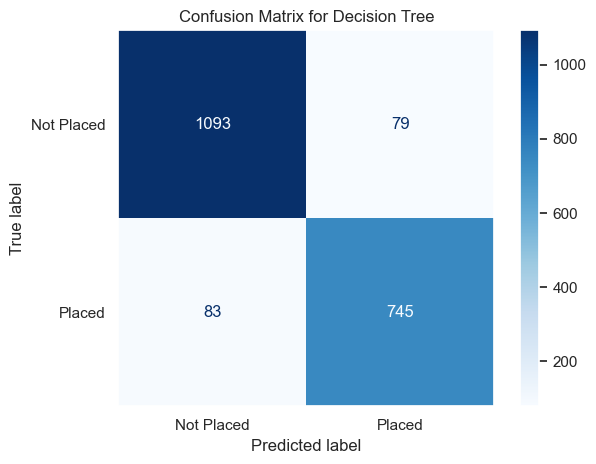

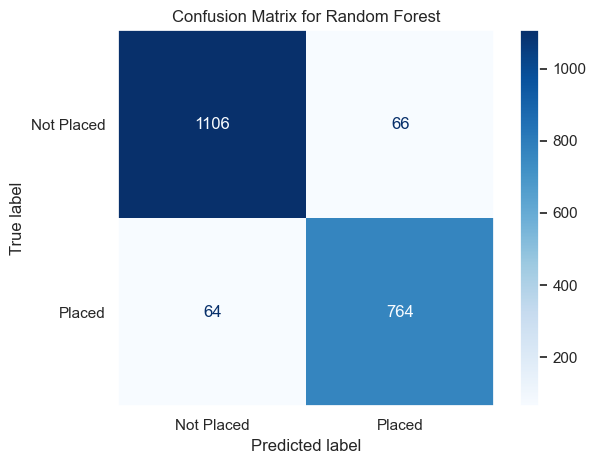

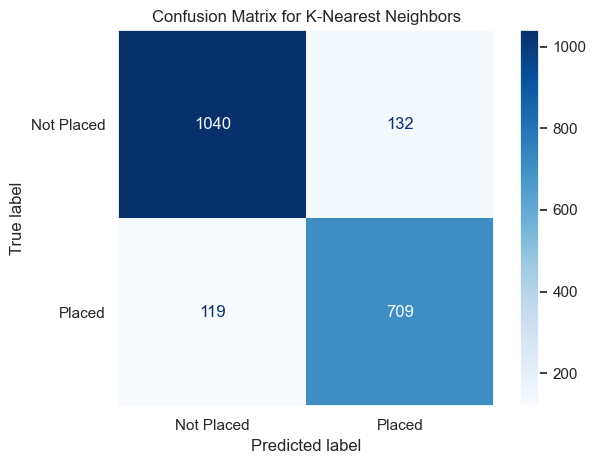

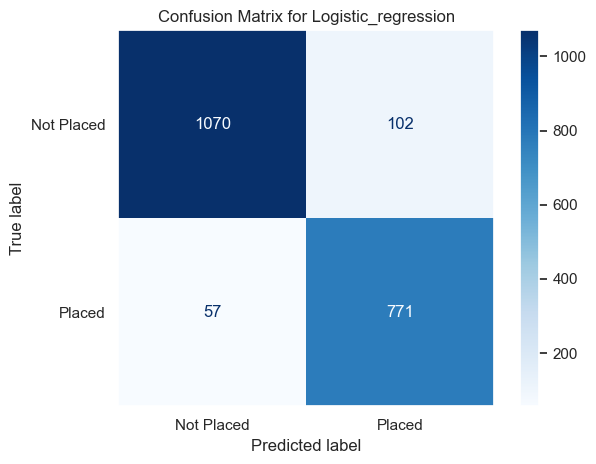

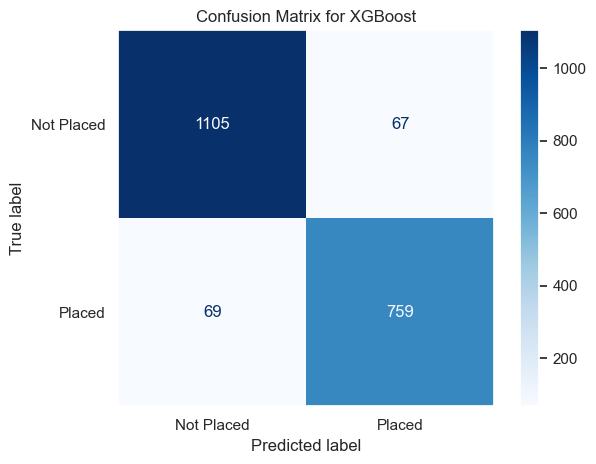

In [21]:
# Iterate through models to calculate and store metrics
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    metrics_dict[model_name] = {
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'F1 Score': f1 * 100
    }
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()



In [22]:
# Dictionary to store metrics for all models
metrics_dict = {}

# Iterate through models to calculate and store metrics
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    metrics_dict[model_name] = {
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'F1 Score': f1 * 100
    }
    


Metrics Comparison Table:
                     Accuracy  Precision     Recall   F1 Score
Random Forest           93.50  92.048193  92.270531  92.159228
XGBoost                 93.20  91.888620  91.666667  91.777509
Logistic_regression     92.05  88.316151  93.115942  90.652557
Decision Tree           91.90  90.412621  89.975845  90.193705
K-Nearest Neighbors     87.45  84.304400  85.628019  84.961055


<Figure size 1400x800 with 0 Axes>

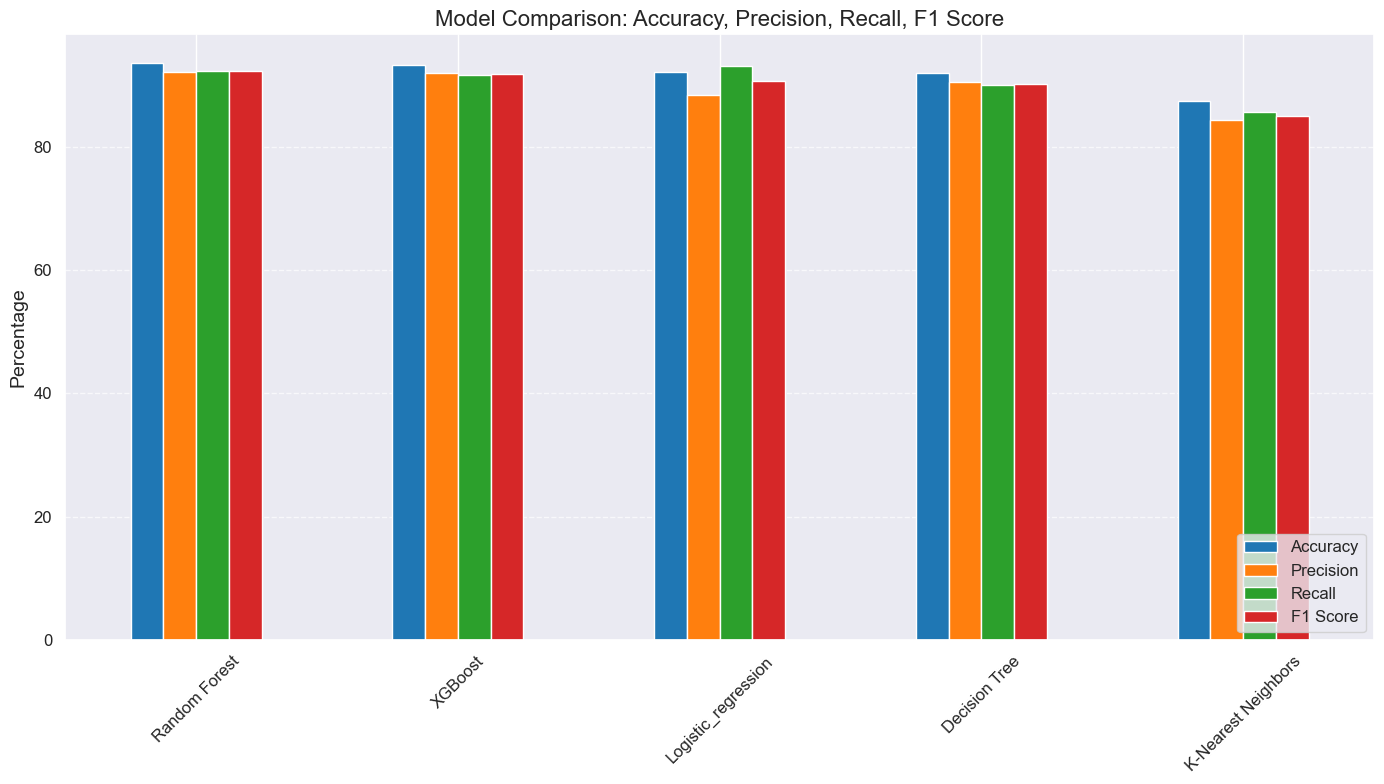

In [23]:
# Set seaborn style to darkgrid for better contrast
sns.set(style="darkgrid")

# Convert metrics_dict to a DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics_dict).T  # Transpose for better readability
metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

# Display the metrics comparison table
print("\nMetrics Comparison Table:")
print(metrics_df)

# Plot metrics for visual comparison
plt.figure(figsize=(14, 8))  # Make the plot bigger
metrics_df.plot(kind='bar', figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Set the title and labels
plt.title("Model Comparison: Accuracy, Precision, Recall, F1 Score", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout and add grid
plt.legend(loc='lower right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Random Forest Accuracy: 93.90%
Best Random Forest Precision: 91.82%
Best Random Forest Recall: 93.60%
Best Random Forest F1 Score: 92.70%


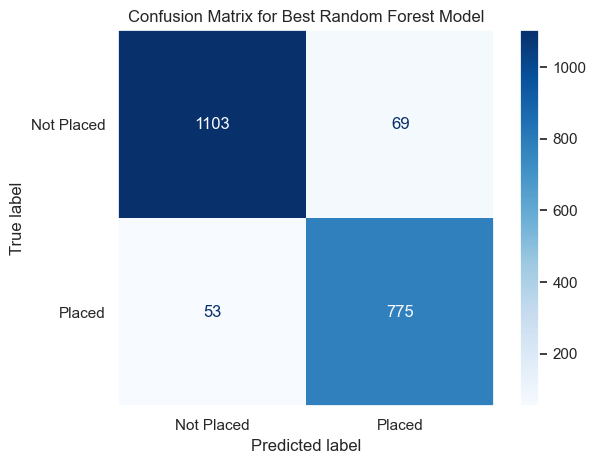

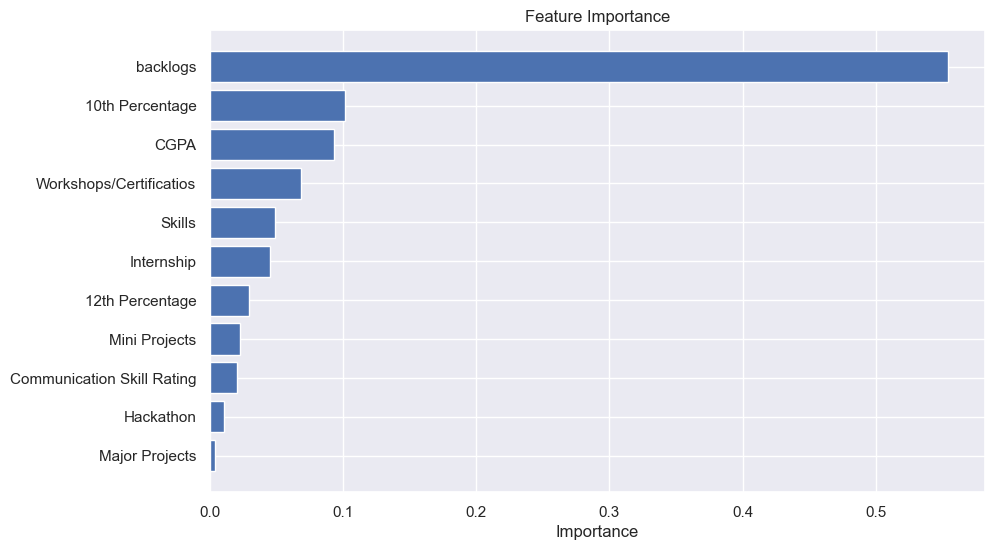

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}

# Initialize RandomizedSearchCV with Random Forest and the parameter distribution
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, 
                                   n_iter=100, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search on the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Get the best model from random search
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate and print the new metrics
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f"Best Random Forest Accuracy: {accuracy_best_rf * 100:.2f}%")
print(f"Best Random Forest Precision: {precision_best_rf * 100:.2f}%")
print(f"Best Random Forest Recall: {recall_best_rf * 100:.2f}%")
print(f"Best Random Forest F1 Score: {f1_best_rf * 100:.2f}%")

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Not Placed', 'Placed'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.grid(False)
plt.tight_layout()
plt.show()

# Assuming you have a list of feature names
feature_names = ['CGPA','Major Projects','Workshops/Certificatios','Mini Projects','Skills','Communication Skill Rating','Internship','Hackathon','12th Percentage','10th Percentage'	,'backlogs']  # Replace with actual feature names

# Convert X_train (which is currently a NumPy array) into a DataFrame with proper column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Extract feature importances and create a DataFrame
importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

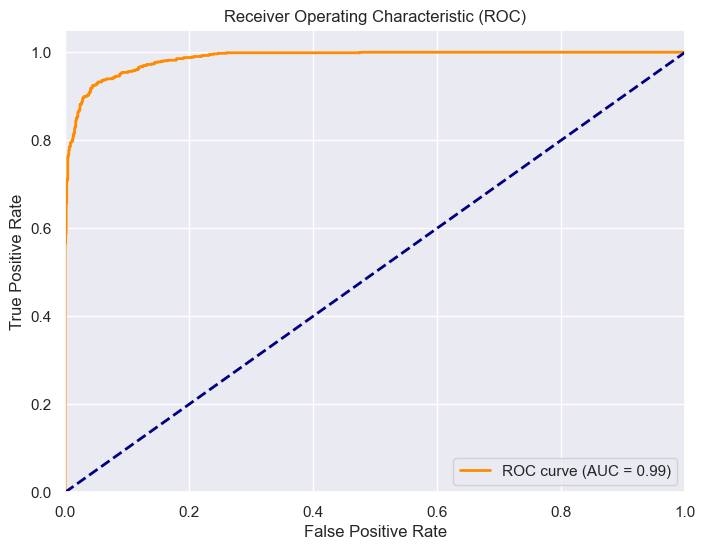

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# You can choose the threshold that you think balances both True Positive Rate and False Positive Rate


In [26]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted probabilities for the positive class (Placed)
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

# List of thresholds to try (e.g., 0.4, 0.45, 0.5, 0.55, 0.6)
thresholds = np.arange(0.1, 1.0, 0.05)
best_threshold = 0.5
best_f1 = 0

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold
    
    # Calculate precision, recall, and F1-score for each threshold
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    print(f"Threshold: {threshold:.2f} -> Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")
    
    # Track the best threshold (highest F1-score)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.2f}")


Threshold: 0.10 -> Precision: 0.76, Recall: 0.99, F1: 0.86
Threshold: 0.15 -> Precision: 0.79, Recall: 0.99, F1: 0.88
Threshold: 0.20 -> Precision: 0.82, Recall: 0.98, F1: 0.89
Threshold: 0.25 -> Precision: 0.83, Recall: 0.97, F1: 0.90
Threshold: 0.30 -> Precision: 0.84, Recall: 0.97, F1: 0.90
Threshold: 0.35 -> Precision: 0.87, Recall: 0.96, F1: 0.91
Threshold: 0.40 -> Precision: 0.88, Recall: 0.95, F1: 0.92
Threshold: 0.45 -> Precision: 0.90, Recall: 0.94, F1: 0.92
Threshold: 0.50 -> Precision: 0.92, Recall: 0.94, F1: 0.93
Threshold: 0.55 -> Precision: 0.93, Recall: 0.93, F1: 0.93
Threshold: 0.60 -> Precision: 0.95, Recall: 0.90, F1: 0.92
Threshold: 0.65 -> Precision: 0.96, Recall: 0.89, F1: 0.92
Threshold: 0.70 -> Precision: 0.97, Recall: 0.86, F1: 0.91
Threshold: 0.75 -> Precision: 0.97, Recall: 0.84, F1: 0.90
Threshold: 0.80 -> Precision: 0.98, Recall: 0.80, F1: 0.88
Threshold: 0.85 -> Precision: 0.99, Recall: 0.78, F1: 0.87
Threshold: 0.90 -> Precision: 0.99, Recall: 0.71, F1: 0.

Accuracy with Custom Threshold: 94.20%
Precision with Custom Threshold: 93.41%
Recall with Custom Threshold: 92.51%
F1 Score with Custom Threshold: 92.96%


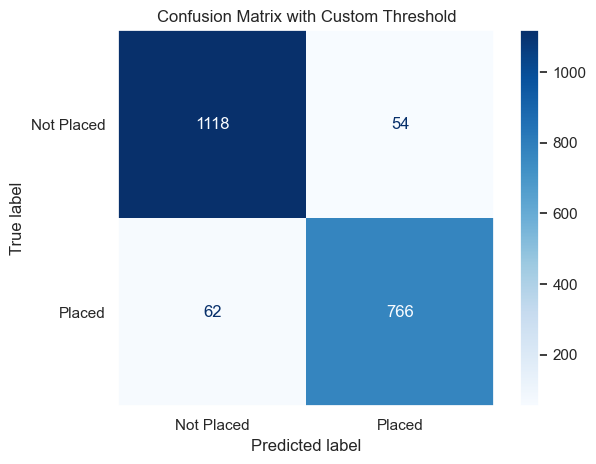

In [27]:
# Get predicted probabilities
probabilities = best_rf_model.predict_proba(X_test)

# Define a custom threshold (e.g., 0.6 instead of 0.5)
custom_threshold = 0.55

# Convert probabilities to class labels based on the custom threshold
y_pred_custom_threshold = (probabilities[:, 1] >= custom_threshold).astype(int)

# Now calculate the metrics for the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom_threshold)
precision_custom = precision_score(y_test, y_pred_custom_threshold)
recall_custom = recall_score(y_test, y_pred_custom_threshold)
f1_custom = f1_score(y_test, y_pred_custom_threshold)

print(f"Accuracy with Custom Threshold: {accuracy_custom * 100:.2f}%")
print(f"Precision with Custom Threshold: {precision_custom * 100:.2f}%")
print(f"Recall with Custom Threshold: {recall_custom * 100:.2f}%")
print(f"F1 Score with Custom Threshold: {f1_custom * 100:.2f}%")

# You can also plot a confusion matrix for this custom threshold
cm_custom_threshold = confusion_matrix(y_test, y_pred_custom_threshold)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom_threshold, display_labels=['Not Placed', 'Placed'])
disp_custom.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Custom Threshold')
plt.grid(False)
plt.tight_layout()
plt.show()


In [28]:
import joblib
joblib.dump(scaler, 'models/scalermajor.pkl')


['models/scalermajor.pkl']

In [29]:
import joblib

# Save the best model
joblib.dump(best_rf_model, 'models/best_random_forest_model.pkl')


['models/best_random_forest_model.pkl']

In [30]:
import os

model_path = 'models/best_random_forest_model.pkl'
scaler_path = 'models/scalermajor.pkl'

if os.path.exists(model_path) and os.path.exists(scaler_path):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    print("Model and Scaler loaded successfully.")
else:
    print("Model or Scaler file does not exist.")


Model and Scaler loaded successfully.


In [31]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# 1. Prepare the input data
data_point = pd.DataFrame({
    'CGPA': [8.9],
    'Major Projects': [0],
    'Workshops/Certificatios': [3],
    'Mini Projects': [2],
    'Skills': [9],
    'Communication Skill Rating': [4],
    'Internship': [1],
    'Hackathon': [1],
    '12th Percentage': [78],
    '10th Percentage': [82],
    'backlogs': [0]
})

# 2. Preprocess the data using the saved scaler
# Load the saved scaler
scaler = joblib.load('models/scalermajor.pkl')

# Scale the input data
data_point_scaled = scaler.transform(data_point)

# 3. Make a prediction using the saved model
# Load the saved Random Forest model
model = joblib.load('models/best_random_forest_model.pkl')

# Get the predicted probabilities
probabilities = model.predict_proba(data_point_scaled)

# Define your custom threshold (e.g., 0.55)
custom_threshold = 0.55

# Convert the probabilities to predictions using the custom threshold
placement_probability = probabilities[0][1]  # Probability for class 1 (Placed)
placement_prediction = placement_probability >= custom_threshold

# 4. Output the prediction based on the custom threshold
if placement_prediction:
    placement_status = "Placed"
else:
    placement_status = "Not Placed"

# Print prediction and the probability of placement
print(f"Prediction: {placement_status}")
print(f"Placement Probability: {placement_probability * 100:.2f}%")


Prediction: Placed
Placement Probability: 97.44%


In [32]:
# Actual label for this data point (1 for "Placed", 0 for "Not Placed")
actual_label = 1  # Replace with actual label (this is just an example)

# Check if the model's prediction is correct
if placement_prediction == (actual_label == 1):
    print(f"Prediction: {placement_status} - The prediction is correct.")
else:
    print(f"Prediction: {placement_status} - The prediction is incorrect.")

Prediction: Placed - The prediction is correct.


In [33]:
# Get the probability prediction
probabilities = best_rf_model.predict_proba(data_point_scaled)

# Extract the probability of the 'Placed' class (class 1)
placed_probability = probabilities[0][1]

# Format the probability as a percentage
print(f"Probability of being placed: {placed_probability:.2%}")


Probability of being placed: 97.44%
